In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

from utils.io_utils import IOUtils
from utils.nlp_utils import NLPUtils

SAVED_PARAMETERS_DIR_NAME = os.path.join(os.path.abspath(''), "../../../data/saved_parameters")
    

Using the default treebank "en_ewt" for language "en".
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/huseyinalecakir/Desktop/Security/source/PermissionDescriptionFidelity/utils/../../../data/models/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: depparse
With settings: 
{'model_path': '/Users/huseyinalecakir/Desktop/Security/source/PermissionDescriptionFidelity/utils/../../../data/models/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/Users/huseyinalecakir/Desktop/Security/source/PermissionDescriptionFidelity/utils/../../../data/models/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---


In [2]:
embedding_file = os.path.join(SAVED_PARAMETERS_DIR_NAME, "embeddings.pickle")
embedding_file_type = "pickle"
saved_vocab_file = os.path.join(SAVED_PARAMETERS_DIR_NAME, "vocab.txt")

In [3]:
ext_embeddings, ext_emb_dim = IOUtils.load_embeddings_file(embedding_file,
                                                           embedding_file_type,
                                                           lower=True)

In [35]:
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm

def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

In [4]:
def read_vocab(file_name):
    words = {}
    with open(file_name, "r") as target:
        for idx, line in enumerate(target):
            words[line.rstrip()] = idx          
    return words

In [15]:
import numpy as np
def dot(v1, v2):
    return sum(x*y for x,y in zip(v1,v2))

def cosine_similarity(x, y):
    cs = dot(x, y) / (np.sqrt(dot(x, x)) * np.sqrt(dot(y, y)))
    return (cs + 1)/2


In [6]:
saved_vocabs = read_vocab(saved_vocab_file)


In [26]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [62]:
source = "google"
destination = "search"
print(cosine_similarity(ext_embeddings[source], ext_embeddings[destination])) # 0.5814327001571655
print(euclidean_distance(ext_embeddings[source], ext_embeddings[destination])) # 1.73346



0.543467471054
4.9094


In [69]:
source = "google"
destination = "work"
print(cosine_similarity( ext_embeddings[source], ext_embeddings[destination])) # 0.5681213513016701
print(euclidean_distance(ext_embeddings[source], ext_embeddings[destination])) # 1.49079



0.528761454034
4.98766


In [60]:
source = ["google"]
destination = ["search", "efficient"]
s = np.mean([ext_embeddings[i] for i in source], axis=0)
d = np.mean([ext_embeddings[i] for i in destination], axis=0)
print(cosine_similarity(s, d)) # 0.6448605805635452
print(euclidean_distance(s, d)) # 1.01008



0.552515772091
4.85969


In [73]:
def draw_distribution(data):
    from matplotlib import pyplot as plt
    import seaborn as sns
    sns.set_style('darkgrid')
    sns.distplot(data)
    plt.show()

In [181]:
import random
def find_similarities(words, model):
    sims = {"source" : {}, "destionation" : {}, "similarity" : {}}
    index = 0
    for word in words:
        vec1 = None
        if "_" in word:
            splitted = word.split("_")
            vec1 = model[splitted[0]] * model[splitted[1]]
        else:
            vec1 = model[word]
        lst = list(model.keys())
        random.shuffle(lst)
        for idx, key in zip(range(300), lst): 
            sims["source"][index] = word
            sims["destionation"][index] = key
            sims["similarity"][index] = cosine_similarity(vec1, model[key]) 
            index += 1
    return sims

In [158]:
import operator
def find_most_sim(similarities, top_k):
    sorted_x = sorted(similarities.items(), key=operator.itemgetter(1), reverse=True)
    for index, (key, val) in zip(range(top_k), sorted_x):
        print("{}. {} - {}".format(index+1, key, val))
    print("")

In [159]:
def draw_boxplot(data):
    from matplotlib import pyplot as plt
    import seaborn as sns
    ax = sns.boxplot(x="day", data=data)
    plt.show()

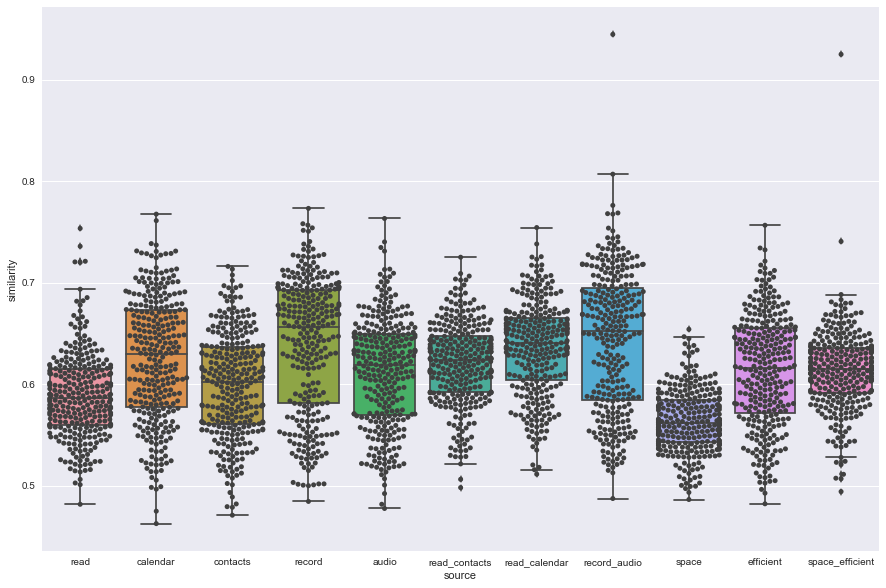

In [180]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
sims = find_similarities(["read",
                          "calendar",
                          "contacts", 
                          "record", 
                          "audio", 
                          "read_contacts", 
                          "read_calendar", 
                          "record_audio",
                          "space",
                          "efficient",
                          "space_efficient"], 
                         ext_embeddings)
df = pd.DataFrame.from_dict(sims) 
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(x="source", y="similarity", data=df)
ax = sns.swarmplot(x="source", y="similarity", data=df, color=".25")

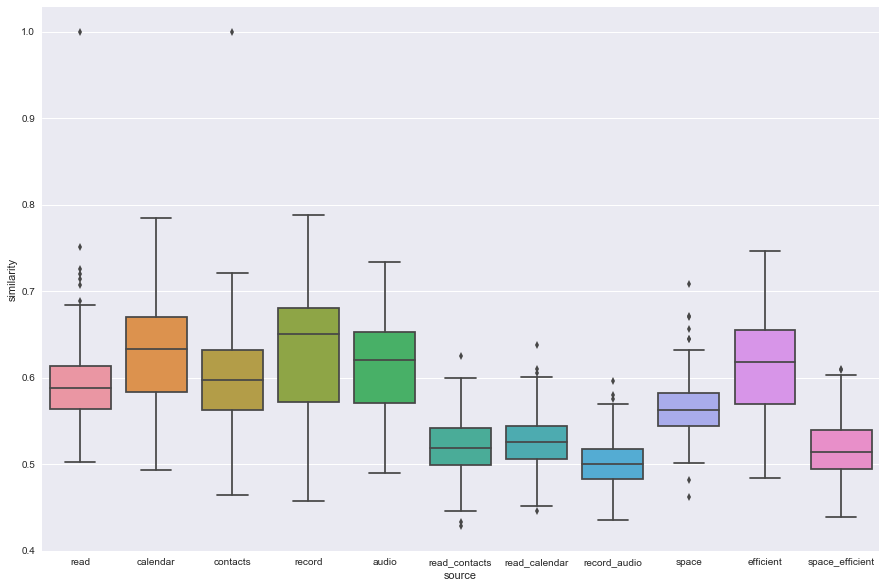

In [183]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
sims = find_similarities(["read",
                          "calendar",
                          "contacts", 
                          "record", 
                          "audio", 
                          "read_contacts", 
                          "read_calendar", 
                          "record_audio",
                          "space",
                          "efficient",
                          "space_efficient"], 
                         ext_embeddings)
df = pd.DataFrame.from_dict(sims) 
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(x="source", y="similarity", data=df)

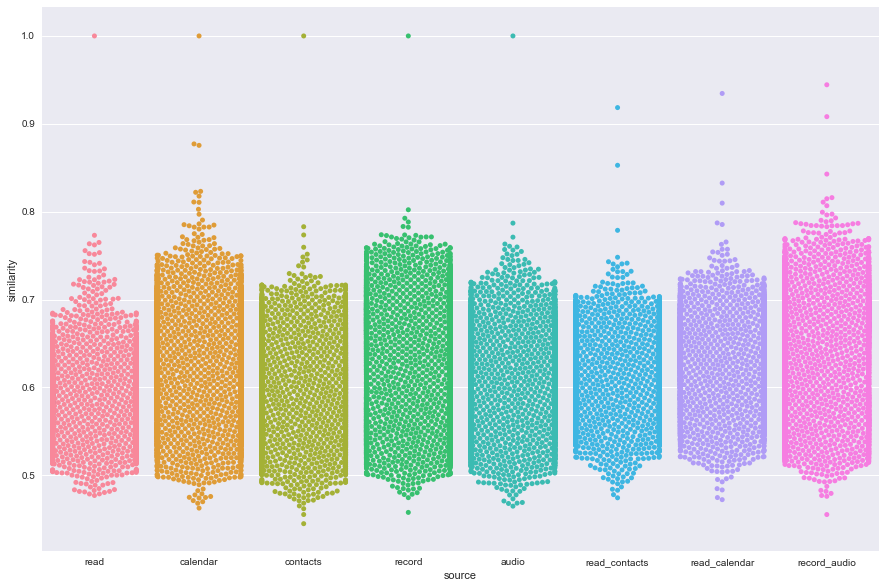

In [153]:
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
sims = find_similarities(["read",
                          "calendar",
                          "contacts", 
                          "record", 
                          "audio", 
                          "read_contacts", 
                          "read_calendar", 
                          "record_audio"], 
                         ext_embeddings)
df = pd.DataFrame.from_dict(sims) 
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(x="source", y="similarity", data=df)
ax = sns.swarmplot(x="source", y="similarity", data=df, color=".25")

In [70]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.keys():
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

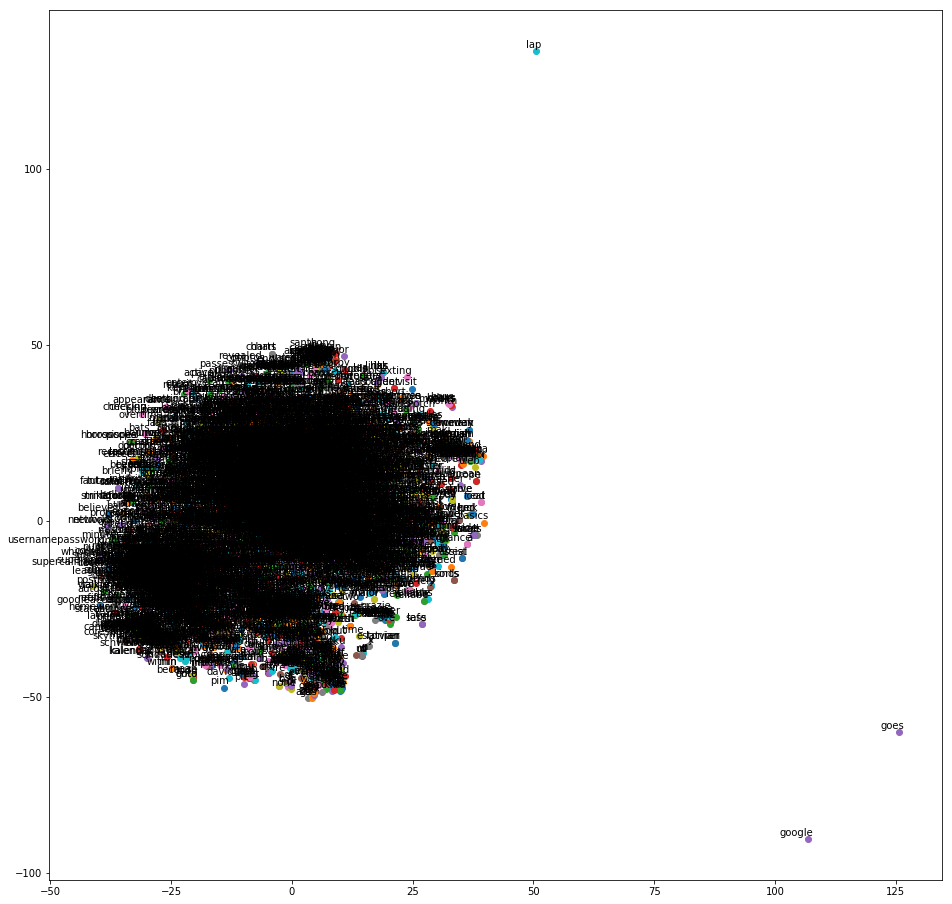

In [71]:
tsne_plot(ext_embeddings)